#Tech Layoffs, USA (2022-2023)

The dataset contains tracked numbers from tech layoffs across the United States over the last year (2022 and Jan 2023). The dataset was obtained in csv format [Kaggle](https://www.kaggle.com/datasets/salimwid/technology-company-layoffs-20222023-data?resource=download).

##Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

##Load Data

Load the csv file on Google Colab

In [ ]:
data = pd.read_csv("/content/tech_layoffs.csv")

In [ ]:
data.head()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,NaN
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private,NaN
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,NaN
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,NaN
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,"Per Axios, 22 of the employees laid off were f..."


##Data Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   company                        489 non-null    object
 1   total_layoffs                  489 non-null    object
 2   impacted_workforce_percentage  489 non-null    object
 3   reported_date                  489 non-null    object
 4   industry                       489 non-null    object
 5   headquarter_location           489 non-null    object
 6   sources                        489 non-null    object
 7   status                         489 non-null    object
 8   additional_notes               22 non-null     object
dtypes: object(9)
memory usage: 34.5+ KB


###Check for NaN

Checking for null values within the data set

In [ ]:
data.isna().sum()

company                            0
total_layoffs                      0
impacted_workforce_percentage      0
reported_date                      0
industry                           0
headquarter_location               0
sources                            0
status                             0
additional_notes                 467
dtype: int64



> The additional_notes column does not contribute to the analysis of this dataset, hence, it will be dropped from the table



###Date Manipulation

Splitting the 'reported date' column into month and year columns for further analysis of the data during different periods of the year

In [ ]:
data['reported'] = pd.to_datetime(data['reported_date'])
data['month'] = data['reported'].dt.month 
data['month_nm'] = data['reported'].dt.month
data['year'] = data['reported'].dt.year
data.head()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes,reported,month,month_nm,year
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,NaN,2022-12-09,12,12,2022
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private,NaN,2022-09-19,9,9,2022
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,NaN,2022-08-20,8,8,2022
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,NaN,2023-01-18,1,1,2023
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,"Per Axios, 22 of the employees laid off were f...",2022-05-13,5,5,2022


Converting the numerical values of the 'month_nm' column to the month name

In [ ]:
d = dict(enumerate(calendar.month_abbr))
data['month_nm'] = data['month_nm'].map(d)

In [ ]:
data.drop(['reported_date'], axis = 1, inplace = True)
data.drop(['additional_notes'], axis = 1, inplace = True)

In [77]:
data.describe(include = 'all', datetime_is_numeric = True)

,company,total_layoffs,impacted_workforce_percentage,industry,headquarter_location,sources,status,reported,month,month_nm,year
count,489,489.000000,489.000000,489,489,489,489,489,489.000000,489,489.000000
unique,477,NaN,NaN,289,134,221,2,NaN,NaN,12,NaN
top,DataRobot,NaN,NaN,Fintech,San Francisco,TechCrunch,Private,NaN,NaN,Jan,NaN
freq,2,NaN,NaN,24,136,52,370,NaN,NaN,82,NaN
mean,NaN,282.527607,17.382413,NaN,NaN,NaN,NaN,2022-09-20 07:45:16.564417280,7.237219,NaN,2022.165644
min,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,2022-01-27 00:00:00,1.000000,NaN,2022.000000
25%,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,2022-07-12 00:00:00,5.000000,NaN,2022.000000
50%,NaN,40.000000,10.000000,NaN,NaN,NaN,NaN,2022-10-04 00:00:00,8.000000,NaN,2022.000000
75%,NaN,120.000000,20.000000,NaN,NaN,NaN,NaN,2022-12-06 00:00:00,11.000000,NaN,2022.000000
max,NaN,18000.000000,100.000000,NaN,NaN,NaN,NaN,2023-01-24 00:00:00,12.000000,NaN,2023.000000


###Data Cleaning

Replace all the 'Unclear' in total_layoffs and impacted_workforce_percentage columns with '0' before converting data type to int/float.

In [ ]:
data['total_layoffs'].replace('Unclear', '0', inplace = True)
data['impacted_workforce_percentage'].replace('Unclear', '0', inplace = True)
data.head(3)


,company,total_layoffs,impacted_workforce_percentage,industry,headquarter_location,sources,status,reported,month,month_nm,year
0,C2FO,20,2,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,2022-12-09,12,Dec,2022
1,VideoAmp,0,2,Advertising platforms,Los Angeles,Company memo,Private,2022-09-19,9,Sep,2022
2,Amperity,13,3,"Saas, analytics",Seattle,Geekwire,Private,2022-08-20,8,Aug,2022


###Change Datatype

Adjust the data type for numerical columns like total_layoffs and impacted_workforce_percentage

In [ ]:
data.total_layoffs = data.total_layoffs.astype(float)
data.impacted_workforce_percentage = data.impacted_workforce_percentage.astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   company                        489 non-null    object        
 1   total_layoffs                  489 non-null    float64       
 2   impacted_workforce_percentage  489 non-null    float64       
 3   industry                       489 non-null    object        
 4   headquarter_location           489 non-null    object        
 5   sources                        489 non-null    object        
 6   status                         489 non-null    object        
 7   reported                       489 non-null    datetime64[ns]
 8   month                          489 non-null    int64         
 9   month_nm                       489 non-null    object        
 10  year                           489 non-null    int64         
dtypes: datetime64[ns](1

##EDA

Start with a general overview of the data.

In [ ]:
data.head()

,company,total_layoffs,impacted_workforce_percentage,industry,headquarter_location,sources,status,reported,month,month_nm,year
0,C2FO,20.0,2.0,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,2022-12-09,12,Dec,2022
1,VideoAmp,0.0,2.0,Advertising platforms,Los Angeles,Company memo,Private,2022-09-19,9,Sep,2022
2,Amperity,13.0,3.0,"Saas, analytics",Seattle,Geekwire,Private,2022-08-20,8,Aug,2022
3,Addepar,20.0,3.0,"fintech, data analytics","Mountain View, CA",Fortune,Private,2023-01-18,1,Jan,2023
4,Thirty Madison,24.0,3.0,Health Care,New York,Axios,Private,2022-05-13,5,May,2022


###Analysis by Year

In [ ]:
data.groupby(['year'])['total_layoffs'].count()

year
2022    408
2023     81
Name: total_layoffs, dtype: int64

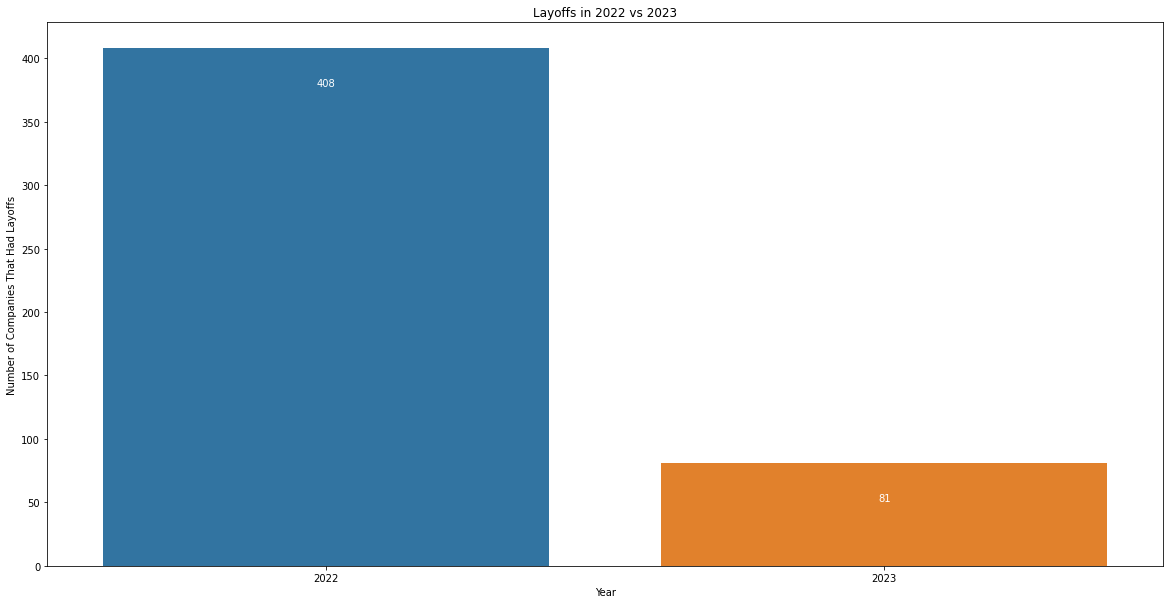

In [ ]:
fig, axis = plt.subplots(figsize = (20, 10))
pt = sns.countplot(x = "year",  data = data,
              ax = axis)
for container in pt.containers:
    pt.bar_label(container, padding = -40, color = 'white')
plt.title("Layoffs in 2022 vs 2023")
plt.xlabel('Year')
plt.ylabel('Number of Companies That Had Layoffs')
plt.show()



> The layoffs in Jan 2023 (81) alone already sums up to 19.9% of the total number of layoffs (408) in the entire year of 2022.



In [ ]:
year_sum = data.groupby(['year'])['total_layoffs'].sum().sort_values(ascending = False)
year_sum = year_sum.to_frame().reset_index()
year_sum

,year,total_layoffs
0,2022,71507.0
1,2023,66649.0


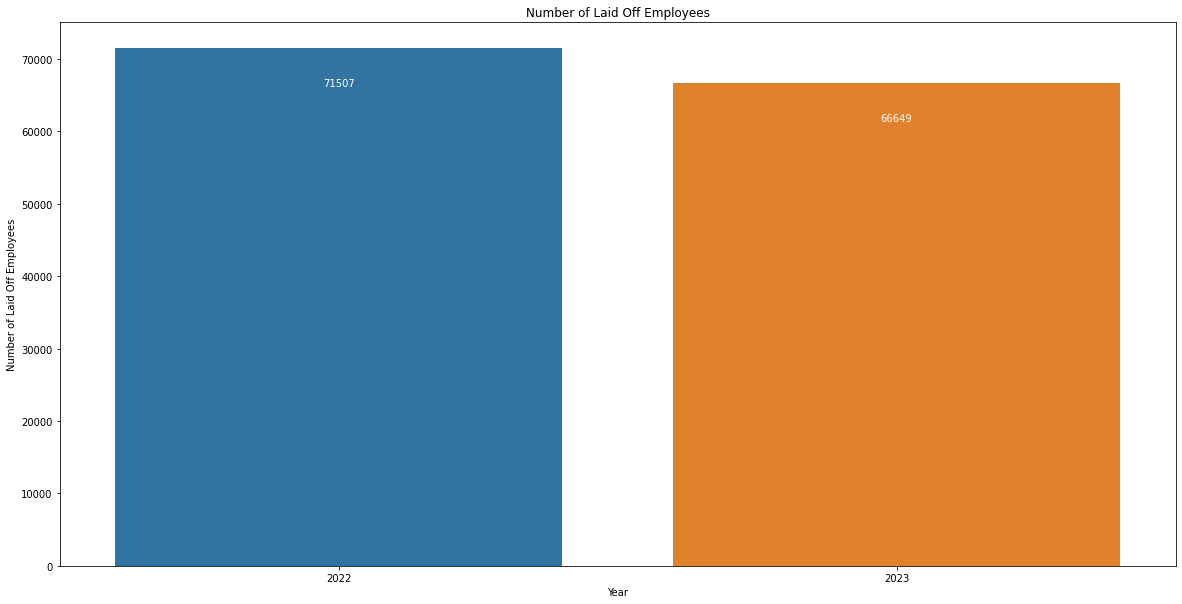

In [ ]:
fig, axis = plt.subplots(figsize = (20, 10))
pt = sns.barplot(x = 'year' , y = 'total_layoffs', data = year_sum,
              ax = axis)
for container in pt.containers:
    pt.bar_label(container, padding = -40, color = 'white')
plt.title("Number of Laid Off Employees")
plt.xlabel('Year')
plt.ylabel('Number of Laid Off Employees')
plt.show()



> The number of laid off employees in Jan 2023 (66649) alone already sums up to 93.2% of the total number of laid off employees (71507) in the entire year of 2022. The upward trend in the increase in number of laid off employees picked up in Fall 2022, and Jan 2023 is riding that trend.



Number of private and public companies that laid off employees grouped by the year the layoffs occurred

In [ ]:
data.groupby(['year', 'status'])['total_layoffs'].count()

year  status 
2022  Private    323
      Public      85
2023  Private     47
      Public      34
Name: total_layoffs, dtype: int64

Number of laid off employees from private and public companies

In [ ]:
data.groupby(['year', 'status'])['total_layoffs'].sum()

year  status 
2022  Private    30290.0
      Public     41217.0
2023  Private     3356.0
      Public     63293.0
Name: total_layoffs, dtype: float64

In [ ]:
data.groupby(['year'])['impacted_workforce_percentage'].mean()

year
2022    17.394608
2023    17.320988
Name: impacted_workforce_percentage, dtype: float64

In [ ]:
data.groupby(['year'])['impacted_workforce_percentage'].mean().pct_change()


year
2022         NaN
2023   -0.004232
Name: impacted_workforce_percentage, dtype: float64

> So far, there is a slight decrease in the average impacted workforce percentage in 2023 when compared to 2022. This result is expected because only January data was analyzed for 2023.






### Analysis by Month

In [ ]:
mth = data.groupby(['month', 'month_nm', 'year'])['total_layoffs'].count().sort_values(ascending = True)
mth = mth.to_frame().reset_index().sort_values(['year','month'], ascending = True)
mth

,month,month_nm,year,total_layoffs
0,1,Jan,2022,1
1,2,Feb,2022,2
2,3,Mar,2022,5
3,4,Apr,2022,10
4,5,May,2022,29
10,6,Jun,2022,57
9,7,Jul,2022,55
8,8,Aug,2022,52
5,9,Sep,2022,33
6,10,Oct,2022,40


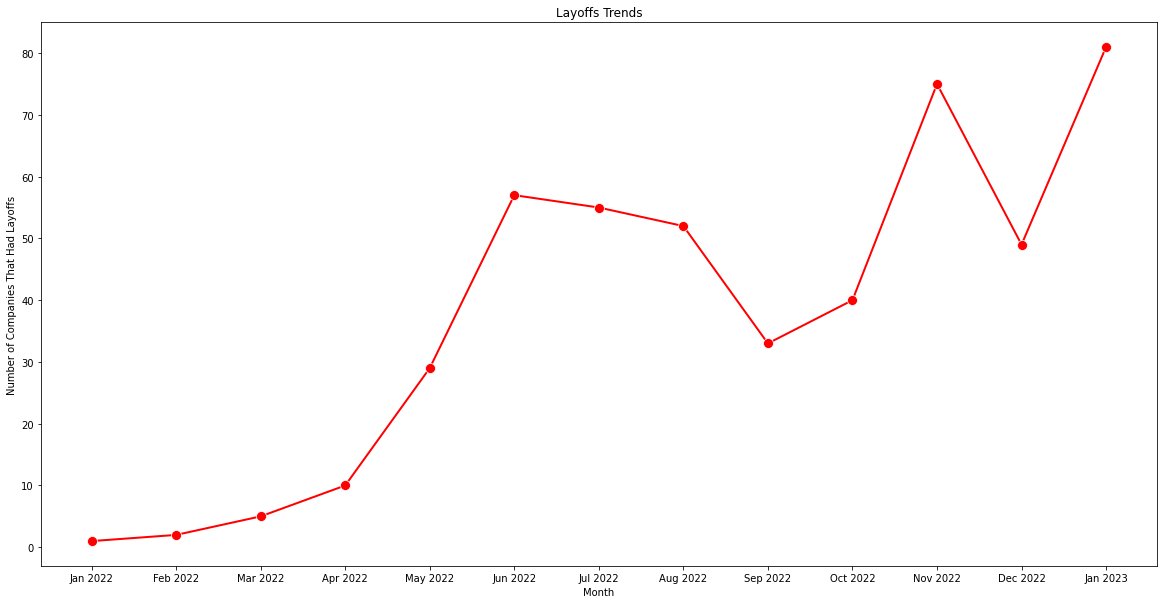

In [ ]:
plt.figure(figsize = (20,10))

mth['period'] = mth[mth.columns[1:3]].apply(lambda x: ' '.join(x.astype(str)),
    axis=1)

sns.lineplot(x = mth.period, y = mth.total_layoffs, marker='o', markersize=10, color='red', linewidth=2)

# add a title and axis labels
plt.title("Layoffs Trends")
plt.xlabel("Month")
plt.ylabel("Number of Companies That Had Layoffs")
plt.show()



> There was a sudden increase in layoffs from May 2022, but the large employee layoffs began in Oct. 2022. The asssumption here is that the layoffs increased in Oct. 2022 because companies began planning for the economic forecasts of 2023. This assumption is bolstered by the amount of companies that decided to announce their hiring freeze around the same time. 





> Jan 2023 recorded the highest number of layoffs in the past few months



In [ ]:
mth1 = data.groupby(['month', 'month_nm', 'year'])['total_layoffs'].sum().sort_values(ascending = True)
mth1 = mth1.to_frame().reset_index().sort_values(['year','month'], ascending = True)
mth1

,month,month_nm,year,total_layoffs
0,1,Jan,2022,70.0
1,2,Feb,2022,168.0
2,3,Mar,2022,250.0
7,4,Apr,2022,5698.0
3,5,May,2022,2453.0
5,6,Jun,2022,3707.0
8,7,Jul,2022,7015.0
9,8,Aug,2022,7279.0
4,9,Sep,2022,2623.0
10,10,Oct,2022,10440.0


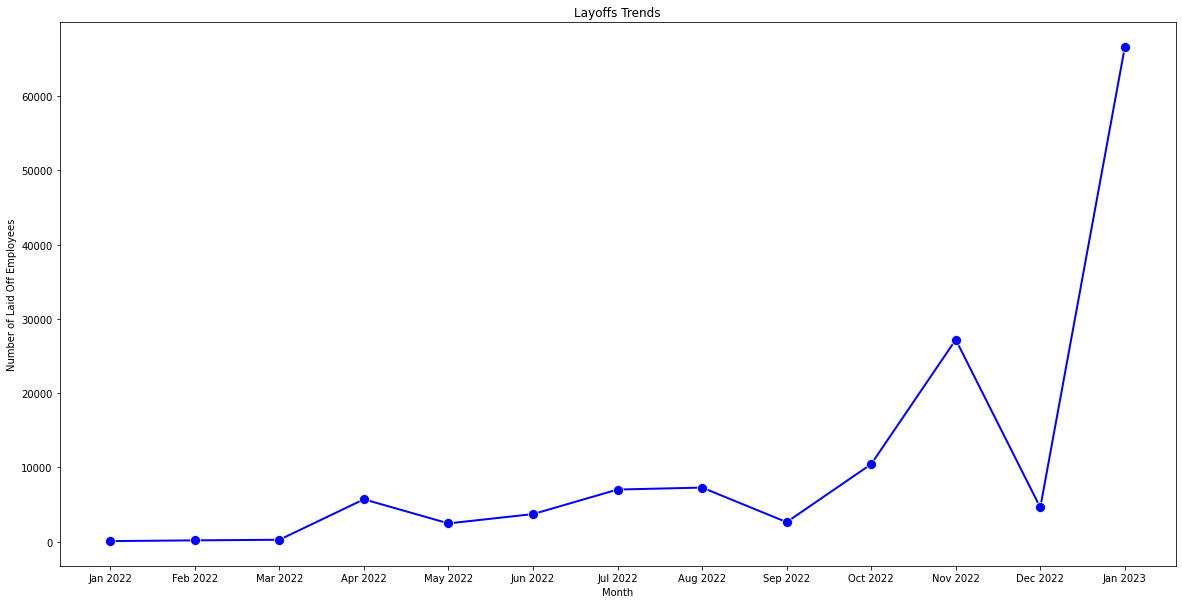

In [ ]:
plt.figure(figsize = (20,10))

mth1['period'] = mth1[mth1.columns[1:3]].apply(lambda x: ' '.join(x.astype(str)),
    axis=1)

sns.lineplot(x = mth1.period, y = mth1.total_layoffs, marker='o', markersize=10, color='blue', linewidth=2)

# add a title and axis labels
plt.title("Layoffs Trends")
plt.xlabel("Month")
plt.ylabel("Number of Laid Off Employees")
plt.show()

> Jan 2023 recorded the highest number of laid off employees



####Jan 2022 vs Jan. 2023

In [ ]:
jan_data = data[data['month_nm'] == 'Jan']
jan_data.head()

,company,total_layoffs,impacted_workforce_percentage,industry,headquarter_location,sources,status,reported,month,month_nm,year
3,Addepar,20.0,3.0,"fintech, data analytics","Mountain View, CA",Fortune,Private,2023-01-18,1,Jan,2023
21,CoinDCX,100.0,6.0,"Blockchain, cryptocurrency","Mumbai, India",Biometric Update,Private,2023-01-11,1,Jan,2023
38,Personetics,30.0,8.0,"Fintech, analytics",New York,Calcalistech,Private,2023-01-05,1,Jan,2023
47,Vox Media,169.0,9.0,"Digital media, journalism","Washington, DC",CNN,Private,2023-01-20,1,Jan,2023
51,Jellyfish US,0.0,9.0,"engineering, software",Boston,BostonInno,Private,2023-01-13,1,Jan,2023


In [ ]:
jan_data.groupby(['year'])['total_layoffs'].sum()

year
2022       70.0
2023    66649.0
Name: total_layoffs, dtype: float64

In [ ]:
jan_data.groupby(['year'])['total_layoffs'].sum().pct_change()

year
2022           NaN
2023    951.128571
Name: total_layoffs, dtype: float64

> There has been a 951% increase in the number of employees laid off between the months of Jan of 2022 and Jan 2023. Largely due to forecasted changes in the country's economy 



### Analysis by Status

In [ ]:
data.groupby(['status'])['total_layoffs'].count()

status
Private    370
Public     119
Name: total_layoffs, dtype: int64

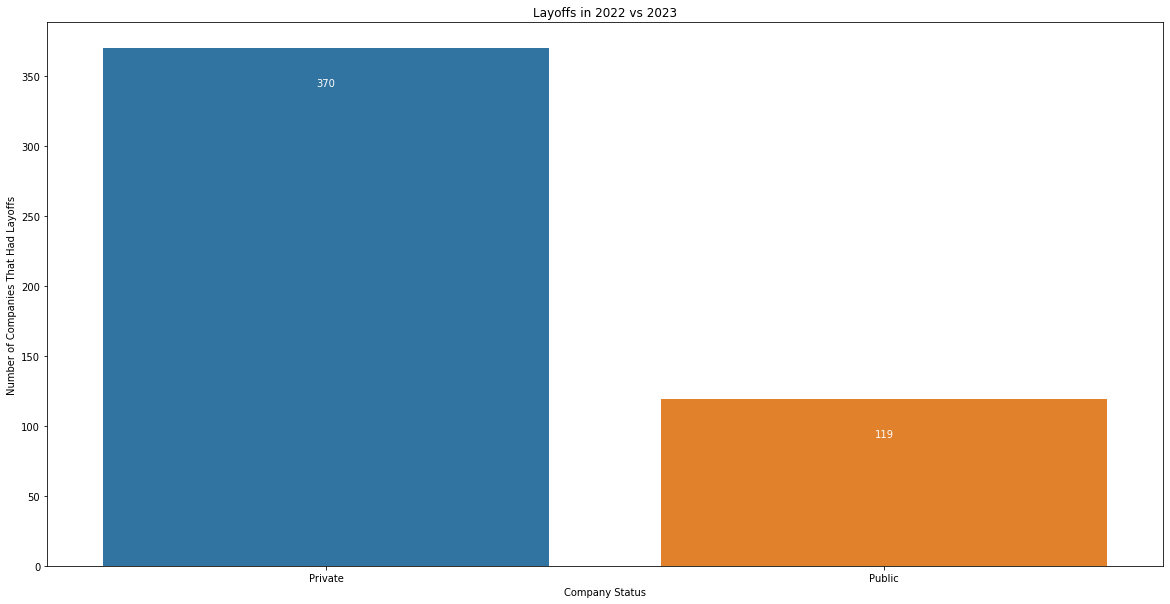

In [ ]:
fig, axis = plt.subplots(figsize = (20, 10))
pt = sns.countplot(x = "status",  data = data,
              ax = axis)
for container in pt.containers:
    pt.bar_label(container, padding = -40, color = 'white')
plt.title("Layoffs in 2022 vs 2023")
plt.xlabel('Company Status')
plt.ylabel('Number of Companies That Had Layoffs')
plt.show()

In [ ]:
stat = data.groupby(['status'])['total_layoffs'].sum().sort_values(ascending = True)
stat = stat.to_frame().reset_index()
stat

,status,total_layoffs
0,Private,33646.0
1,Public,104510.0


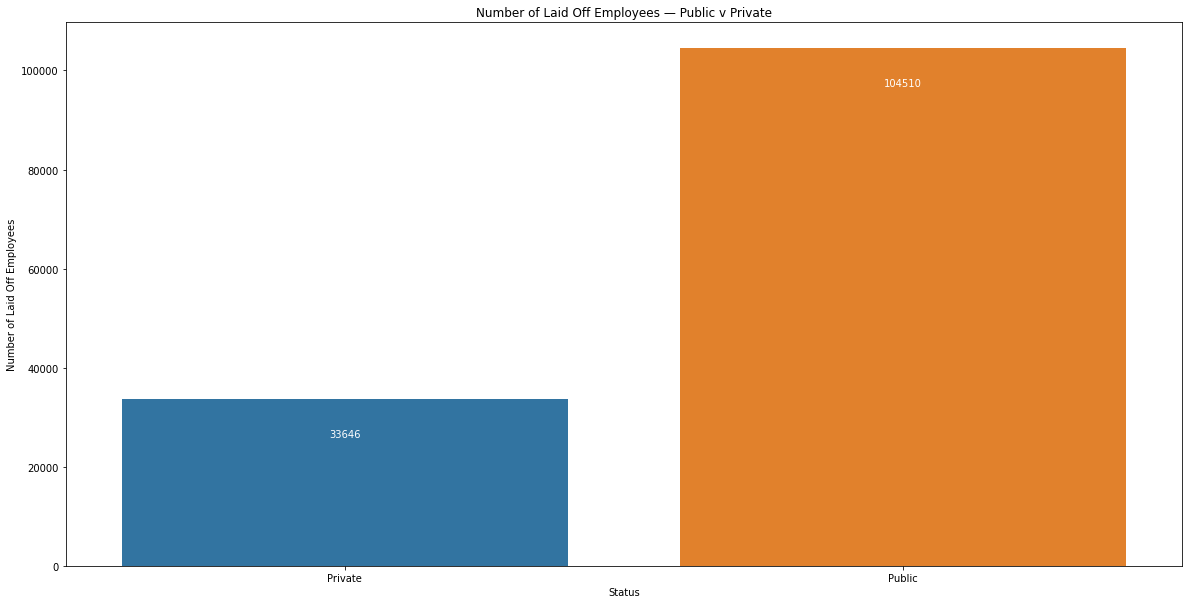

In [ ]:
fig, axis = plt.subplots(figsize = (20, 10))
pt = sns.barplot(x = 'status' , y = 'total_layoffs', data = stat,
              ax = axis)
for container in pt.containers:
    pt.bar_label(container, padding = -40, color = 'white')
plt.title("Number of Laid Off Employees — Public v Private")
plt.xlabel('Status')
plt.ylabel('Number of Laid Off Employees')
plt.show()

In [ ]:
data.groupby(['year', 'month', 'status'])['total_layoffs'].count()

year  month  status 
2022  1      Public      1
      2      Private     2
      3      Private     4
             Public      1
      4      Private     9
             Public      1
      5      Private    24
             Public      5
      6      Private    52
             Public      5
      7      Private    49
             Public      6
      8      Private    34
             Public     18
      9      Private    26
             Public      7
      10     Private    34
             Public      6
      11     Private    56
             Public     19
      12     Private    33
             Public     16
2023  1      Private    47
             Public     34
Name: total_layoffs, dtype: int64

Number of private and public companies that laid off employees grouped by the month the layoffs occurred

In [ ]:
stat2 =data.groupby(['month', 'month_nm', 'year', 'status'])['total_layoffs'].count().sort_values(ascending = True)
stat2 = stat2.to_frame().reset_index().sort_values(['year','month'], ascending = True)
stat2

,month,month_nm,year,status,total_layoffs
0,1,Jan,2022,Public,1
3,2,Feb,2022,Private,2
2,3,Mar,2022,Public,1
4,3,Mar,2022,Private,4
1,4,Apr,2022,Public,1
10,4,Apr,2022,Private,9
5,5,May,2022,Public,5
14,5,May,2022,Private,24
6,6,Jun,2022,Public,5
22,6,Jun,2022,Private,52


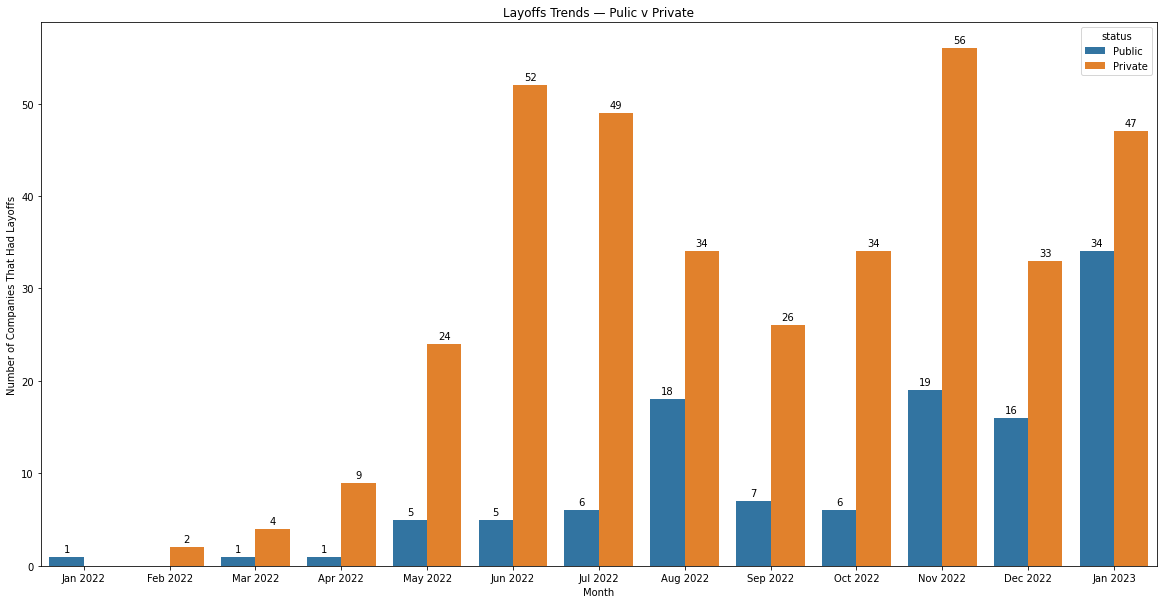

In [ ]:
fig, axis = plt.subplots(figsize = (20, 10))

stat2['period'] = stat2[stat2.columns[1:3]].apply(lambda x: ' '.join(x.astype(str)),
    axis=1)

pt = sns.barplot(x = 'period' , y = 'total_layoffs', hue = 'status', data = stat2,
              ax = axis)
for container in pt.containers:
    pt.bar_label(container, padding = 3, color = 'black')
# add a title and axis labels
plt.title("Layoffs Trends — Pulic v Private")
plt.xlabel("Month")
plt.ylabel("Number of Companies That Had Layoffs")
plt.show()

Number of laid off employees from private and public companies every month

In [ ]:
stat1 = data.groupby(['month', 'month_nm', 'year', 'status'])['total_layoffs'].sum().sort_values(ascending = True)
stat1 = stat1.to_frame().reset_index().sort_values(['year','month'], ascending = True)
stat1


,month,month_nm,year,status,total_layoffs
1,1,Jan,2022,Public,70.0
2,2,Feb,2022,Private,168.0
0,3,Mar,2022,Public,0.0
4,3,Mar,2022,Private,250.0
3,4,Apr,2022,Public,200.0
19,4,Apr,2022,Private,5498.0
5,5,May,2022,Public,532.0
10,5,May,2022,Private,1921.0
6,6,Jun,2022,Public,838.0
13,6,Jun,2022,Private,2869.0


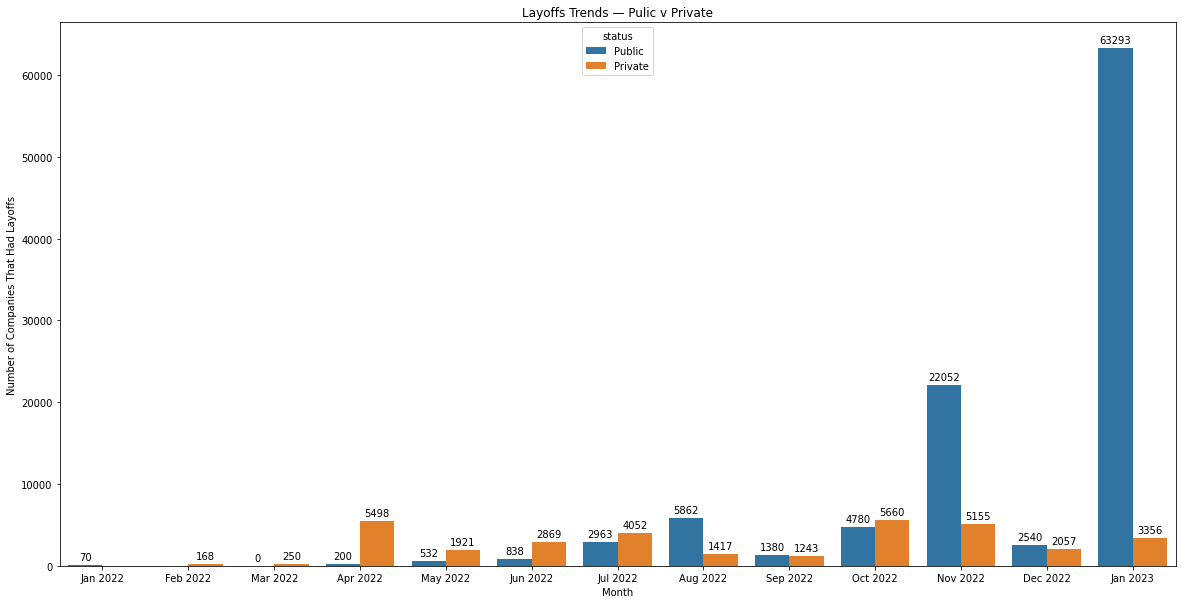

In [ ]:
fig, axis = plt.subplots(figsize = (20, 10))

stat1['period'] = stat1[stat1.columns[1:3]].apply(lambda x: ' '.join(x.astype(str)),
    axis=1)

pt = sns.barplot(x = 'period' , y = 'total_layoffs', hue = 'status', data = stat1,
              ax = axis)
for container in pt.containers:
    pt.bar_label(container, padding = 3, color = 'black')
# add a title and axis labels
plt.title("Layoffs Trends — Pulic v Private")
plt.xlabel("Month")
plt.ylabel("Number of Companies That Had Layoffs")
plt.show()




> More Private companies have conducted layoffs than Public companies. On the other hand, public companies have laid off more employees than the private ones



### Analysis by Location

Top 10 cities with layoff occurences since 2022. 

In [ ]:
city = data.groupby(['headquarter_location'])['total_layoffs'].count().sort_values(ascending = False).head(10)
city = city.to_frame().reset_index()
city

,headquarter_location,total_layoffs
0,San Francisco,136
1,New York,77
2,Seattle,21
3,Los Angeles,20
4,Boston,16
5,Chicago,12
6,"Austin, TX",6
7,Atlanta,5
8,"Mountain View, CA",5
9,San Diego,5


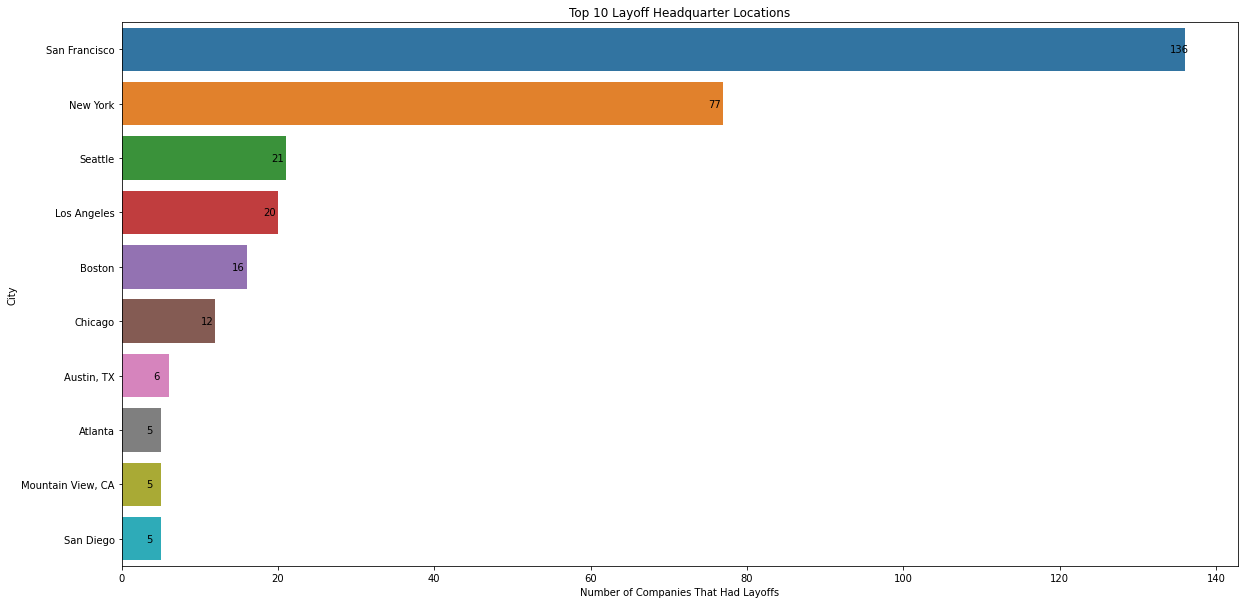

In [ ]:

fig, axis = plt.subplots(figsize = (20, 10))

pt = sns.barplot(y = 'headquarter_location', x = 'total_layoffs', data = city, ax = axis)
for container in pt.containers:
    pt.bar_label(container,padding = -15)
plt.title("Top 10 Layoff Headquarter Locations")
plt.xlabel('Number of Companies That Had Layoffs')
plt.ylabel('City')
plt.show()

Top 10 cities with employee layoffs since 2022. 
City *against* number of laid off employees

In [ ]:
city1 = data.groupby(['headquarter_location'])['total_layoffs'].sum().sort_values(ascending = False).head(10)
city1 = city1.to_frame().reset_index()
city1

,headquarter_location,total_layoffs
0,San Francisco,30745.0
1,Seattle,30477.0
2,New York,15583.0
3,"Mountain View, CA",12147.0
4,"Menlo Park, CA",11000.0
5,"San Jose, CA",4455.0
6,Tempe,4000.0
7,Philadelphia,2300.0
8,Chicago,1840.0
9,Boston,1661.0


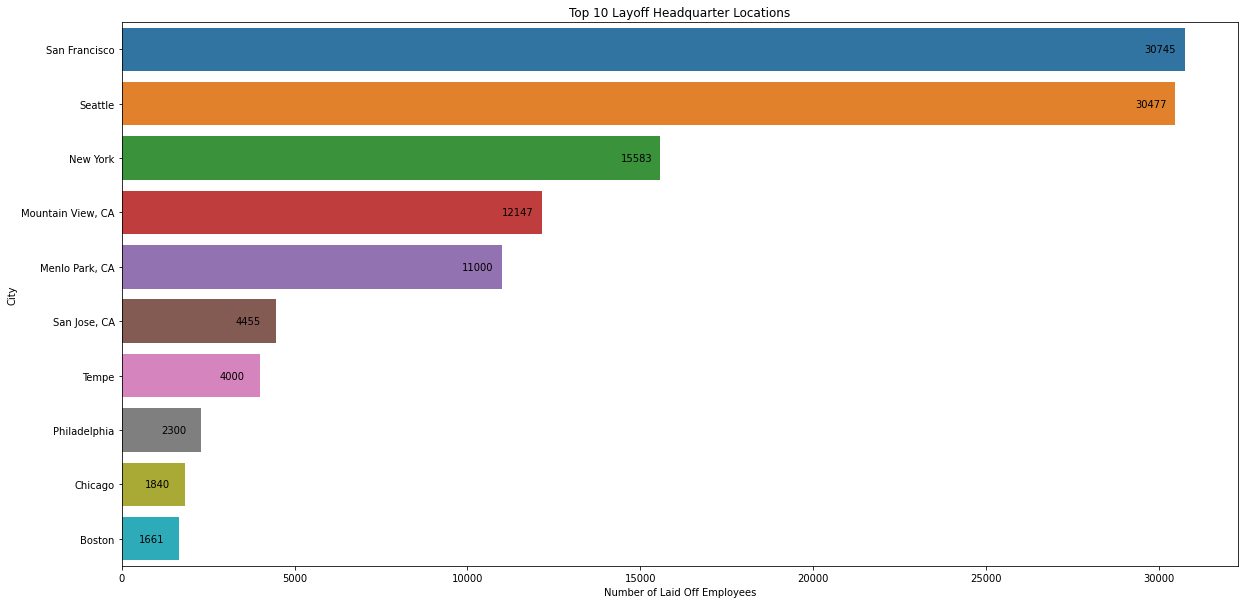

In [ ]:
fig, axis = plt.subplots(figsize = (20, 10))

pt = sns.barplot(y = 'headquarter_location', x = 'total_layoffs', data = city1, ax = axis)
for container in pt.containers:
    pt.bar_label(container,padding = -40)
plt.title("Top 10 Layoff Headquarter Locations")
plt.xlabel('Number of Laid Off Employees')
plt.ylabel('City')
plt.show()

In [ ]:
city2 = data[data.headquarter_location == 'San Francisco']
city2.sort_values(by='total_layoffs', ascending = False).head(5)


,company,total_layoffs,impacted_workforce_percentage,industry,headquarter_location,sources,status,reported,month,month_nm,year
484,Salesforce,9090.0,0.0,"enterprise tech, analytics",San Francisco,New York Times,Public,2023-01-04,1,Jan,2023
463,Twitter,3740.0,70.0,Social Media,San Francisco,The Information,Public,2023-01-05,1,Jan,2023
461,Coinbase,2110.0,43.0,Crypto,San Francisco,CNBC,Public,2023-01-10,1,Jan,2023
387,DoorDash,1250.0,6.0,"Food delivery, ecommerce",San Francisco,Reuters,Public,2022-11-30,11,Nov,2022
195,Kraken,1100.0,30.0,Cryptocurrency,San Francisco,Kraken,Private,2022-11-30,11,Nov,2022




> San Francisco currently has the highest number of layoffs and laid off employees as at Jan 2023. Salesforce is the largest contributor to San Francisco's position on this list. The tech company laid off 9090 employees.





In [ ]:
city3 = data[data.headquarter_location == 'Seattle']
city3.sort_values(by='total_layoffs', ascending = False).head(5)

,company,total_layoffs,impacted_workforce_percentage,industry,headquarter_location,sources,status,reported,month,month_nm,year
378,Amazon,18000.0,5.0,"E-commerce, SaaS",Seattle,Wall Street Journal,Public,2023-01-05,1,Jan,2023
469,Microsoft,10000.0,0.0,Enterprise Software,Seattle,Microsoft,Public,2023-01-18,1,Jan,2023
436,Redfin,1332.0,19.0,PropTech,Seattle,Bloomberg,Public,2022-11-09,11,Nov,2022
379,Zillow,300.0,5.0,PropTech,Seattle,TechCrunch,Public,2022-10-26,10,Oct,2022
274,Rad Power Bikes,163.0,0.0,Transporation,Seattle,GeekWire,Private,2022-07-21,7,Jul,2022




> Coming close in second place on the chart above is Seattle. The largest contributors to their position are Amazon (18000) and Microsoft (10000).



### Analysis by Industry/Company

In [ ]:
ind = data.groupby(['industry'])['total_layoffs'].count().sort_values(ascending = False).head(5)
ind = ind.to_frame().reset_index()
ind

,industry,total_layoffs
0,Fintech,24
1,Health Care,17
2,PropTech,15
3,E-commerce,13
4,Cybersecurity,10


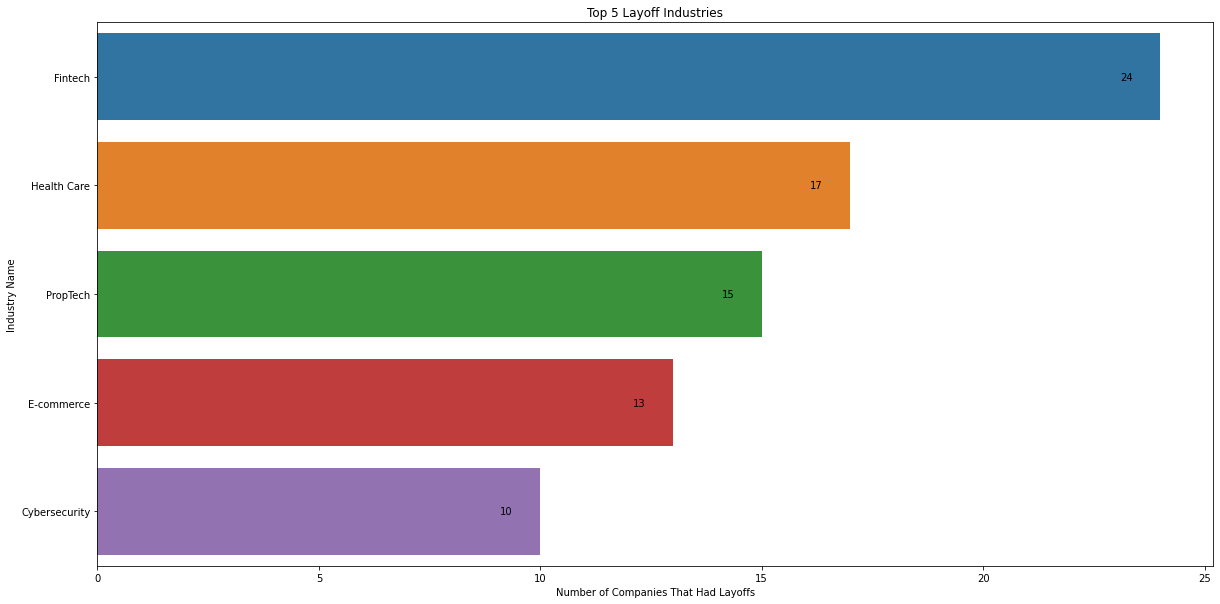

In [ ]:
fig, axis = plt.subplots(figsize = (20, 10))

pt = sns.barplot(x = 'total_layoffs', y = 'industry', data = ind, ax = axis)
for container in pt.containers:
    pt.bar_label(container,padding = -40)
plt.title("Top 5 Layoff Industries")
plt.xlabel('Number of Companies That Had Layoffs')
plt.ylabel('Industry Name')
plt.show()

In [ ]:
ind1 = data.groupby(['industry'])['total_layoffs'].sum().sort_values(ascending = False).head(5)
ind1 = ind1.to_frame().reset_index()
ind1

,industry,total_layoffs
0,"E-commerce, SaaS",18000.0
1,Social media,12420.0
2,"Big tech, internet services",12000.0
3,Enterprise Software,10945.0
4,Fintech,9811.0


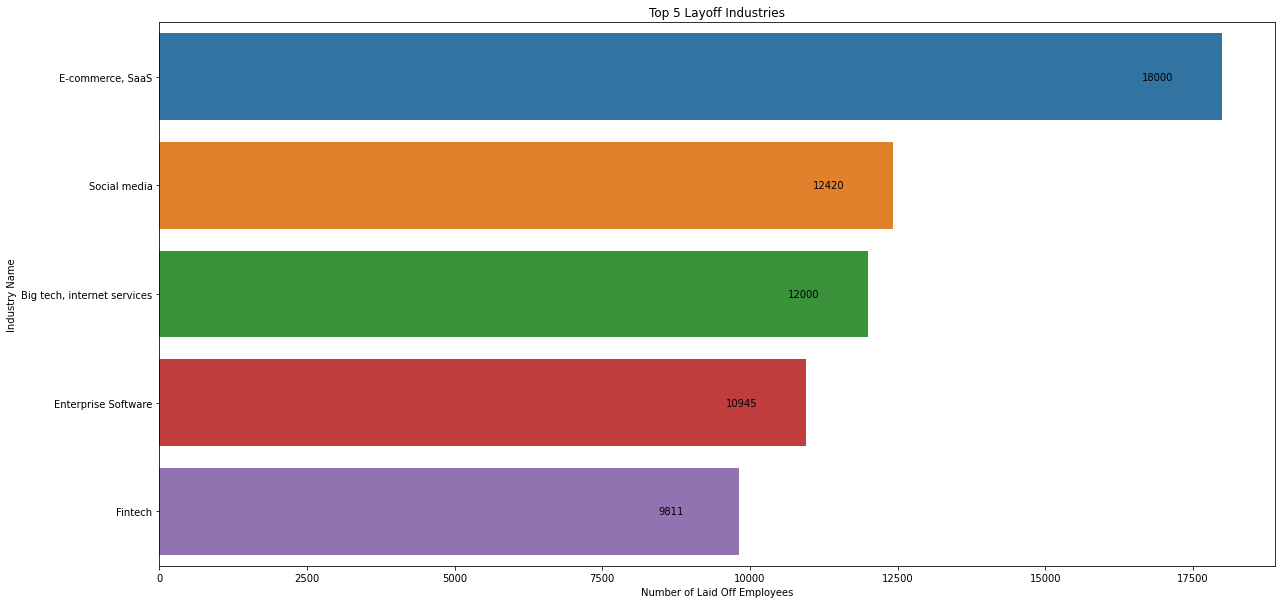

In [ ]:
fig, axis = plt.subplots(figsize = (20, 10))

pt = sns.barplot(x = 'total_layoffs' , y = 'industry', data = ind1,
              ax = axis)
for container in pt.containers:
    pt.bar_label(container, padding = -80)
plt.title("Top 5 Layoff Industries")
plt.xlabel('Number of Laid Off Employees')
plt.ylabel('Industry Name')
plt.show()

In [ ]:
comp = data.groupby(['company'])['total_layoffs'].sum().sort_values(ascending = False).head(10)
comp = comp.to_frame().reset_index()
comp

,company,total_layoffs
0,Amazon,18000.0
1,Alphabet,12000.0
2,Meta,11000.0
3,Microsoft,10000.0
4,Salesforce,9090.0
5,Better.com,5000.0
6,Cisco,4100.0
7,Peloton,4084.0
8,Carvana,4000.0
9,Twitter,3740.0


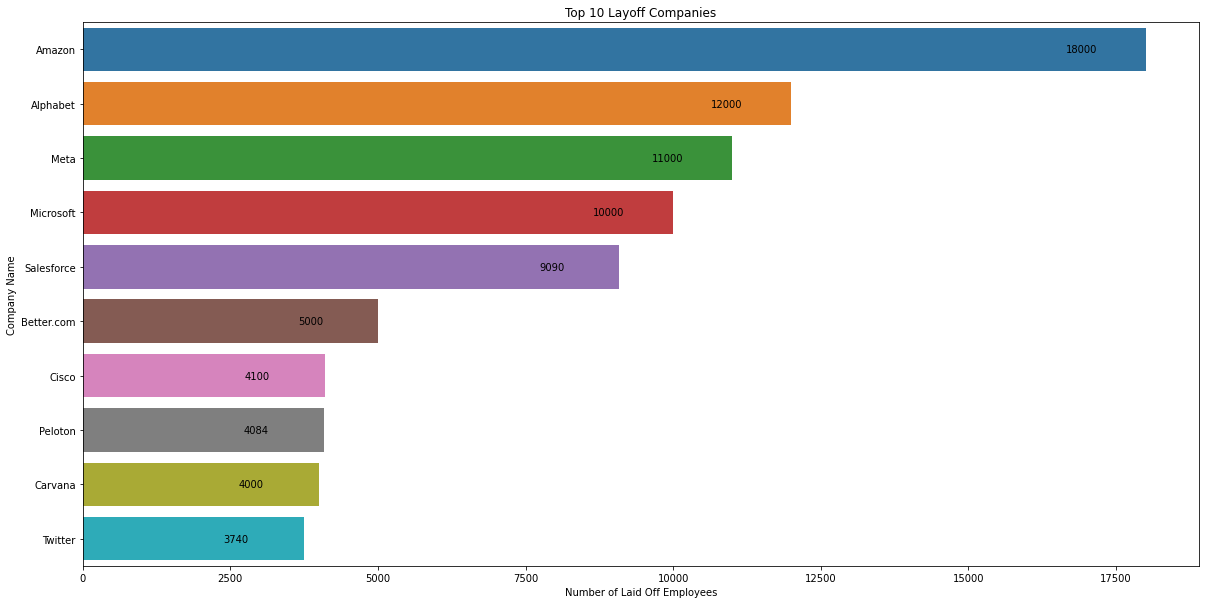

In [ ]:
fig, axis = plt.subplots(figsize=(20, 10))

pt = sns.barplot(x = 'total_layoffs' , y = 'company', data = comp,
              ax = axis)
for container in pt.containers:
    pt.bar_label(container, padding = -80)
plt.title("Top 10 Layoff Companies")
plt.xlabel('Number of Laid Off Employees')
plt.ylabel('Company Name')
plt.show()

In [ ]:
comp1 = data.groupby(['company'])['total_layoffs'].count().sort_values(ascending = False).head(15)
comp1 = comp1.to_frame().reset_index()
comp1

,company,total_layoffs
0,Latch,2
1,Argo AI,2
2,Sundae,2
3,Socure,2
4,Homeward,2
5,TruePill,2
6,On Deck,2
7,Blend,2
8,Gemini,2
9,DataRobot,2


In [ ]:
comp2 = data['impacted_workforce_percentage']
comp2 = comp2.to_frame().reset_index()
comp2['index'] = data['company']
comp2.sort_values(by='impacted_workforce_percentage', ascending = False)

,index,impacted_workforce_percentage
244,Assure,100.0
239,WanderJaunt,100.0
256,Kitty Hawk,100.0
255,Pesto,100.0
254,BlockFi,100.0
...,...,...
329,Metaplex,0.0
330,Kandji,0.0
331,Reforge,0.0
332,Amobee,0.0


In [ ]:
data[data.impacted_workforce_percentage == 0].describe()

,total_layoffs,impacted_workforce_percentage,month,year
count,133.000000,133.0,133.000000,133.000000
mean,401.105263,0.0,7.443609,2022.157895
std,1627.702314,0.0,3.484628,0.366021
min,0.000000,0.0,1.000000,2022.000000
25%,0.000000,0.0,6.000000,2022.000000
50%,12.000000,0.0,8.000000,2022.000000
75%,100.000000,0.0,10.000000,2022.000000
max,12000.000000,0.0,12.000000,2023.000000


In [ ]:
data[data.impacted_workforce_percentage >= 0].describe()

,total_layoffs,impacted_workforce_percentage,month,year
count,489.000000,489.000000,489.000000,489.000000
mean,282.527607,17.382413,7.237219,2022.165644
std,1326.256662,23.682648,3.589169,0.372142
min,0.000000,0.000000,1.000000,2022.000000
25%,0.000000,0.000000,5.000000,2022.000000
50%,40.000000,10.000000,8.000000,2022.000000
75%,120.000000,20.000000,11.000000,2022.000000
max,18000.000000,100.000000,12.000000,2023.000000


In [ ]:
data[data.impacted_workforce_percentage == 100].describe()

,total_layoffs,impacted_workforce_percentage,month,year
count,26.000000,26.0,26.000000,26.000000
mean,68.692308,100.0,7.961538,2022.076923
std,207.647927,0.0,3.168353,0.271746
min,0.000000,100.0,1.000000,2022.000000
25%,0.000000,100.0,6.250000,2022.000000
50%,0.000000,100.0,8.500000,2022.000000
75%,0.000000,100.0,11.000000,2022.000000
max,1000.000000,100.0,12.000000,2023.000000


In [ ]:
data[data.impacted_workforce_percentage > 25].describe()

,total_layoffs,impacted_workforce_percentage,month,year
count,87.000000,87.000000,87.000000,87.000000
mean,240.804598,57.620690,6.954023,2022.195402
std,714.018660,29.848938,3.766153,0.398809
min,0.000000,26.000000,1.000000,2022.000000
25%,0.000000,33.000000,4.000000,2022.000000
50%,46.000000,42.000000,8.000000,2022.000000
75%,130.000000,100.000000,10.000000,2022.000000
max,5000.000000,100.000000,12.000000,2023.000000


In [81]:
data[data.impacted_workforce_percentage.between(0, 26, inclusive = 'neither')].describe()

,total_layoffs,impacted_workforce_percentage,month,year
count,269.000000,269.000000,269.000000,269.000000
mean,237.394052,12.962825,7.226766,2022.159851
std,1313.298656,6.341532,3.588522,0.367151
min,0.000000,1.000000,1.000000,2022.000000
25%,0.000000,8.000000,6.000000,2022.000000
50%,45.000000,12.000000,7.000000,2022.000000
75%,120.000000,18.000000,11.000000,2022.000000
max,18000.000000,25.000000,12.000000,2023.000000


In [ ]:
data[data.impacted_workforce_percentage > 50].describe()

,total_layoffs,impacted_workforce_percentage,month,year
count,33.000000,33.000000,33.000000,33.000000
mean,178.242424,93.454545,7.090909,2022.212121
std,666.088866,13.351243,3.908034,0.415149
min,0.000000,54.000000,1.000000,2022.000000
25%,0.000000,100.000000,4.000000,2022.000000
50%,0.000000,100.000000,8.000000,2022.000000
75%,60.000000,100.000000,11.000000,2022.000000
max,3740.000000,100.000000,12.000000,2023.000000




> An average of 17.4% employees were laid off from the 489 tech companies in this dataset. 26 of these companies laid off 100% of their employees. 

> 269 tech companies laid off 25% (or less) of their employees. 

> From the 87 companies that laid off over 25% of their employees, 33 of them laid off over half of their employees.

> The % of impacted employees remains unknown for 133 companies.








##Analysis Summary

*   The layoffs in Jan 2023 (81) alone already sums up to 19.9% of the total number of layoffs (408) in the entire year of 2022.
*   The number of laid off employees in Jan 2023 (66649) alone already sums up to 93.2% of the total number of laid off employees (71507) in the entire year of 2022.
*   There was a sudden increase in layoffs from May 2022, but the large employee layoffs began in Oct. 2022.
*   More private companies have conducted layoffs in the past year, but on the other hand, public companies have laid off more employees during the same period.
*   The headquarters of most of the companies that conducted layoffs sit in San Francisco. It is also the city with the highest number of laid off employees, closely followed by Seattle.
*   Salesforce is the largest contributor to San Francisco's position on this list. The tech company laid off 9090 employees. For Seattle, the largest contributors to their position are Amazon (18000) and Microsoft(10000).
*   Amazon has laid off the highest number of employees in the past year.
*   About 12 companies have conducted layoffs more than once in the past year.
*   Almost 67000 employees were laid off in Jan 2023, compared to 70 employees that were laid off in Jan 2022. Yielding a *951% increase* when comparing the two months.
*   55% of the tech companies laid off 25% (or less) of their employees in the last one year.












